In [1]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Importing warnings

import warnings
warnings.filterwarnings('ignore')

In [321]:
# Loading the dataset

data = pd.read_csv(r'C:\Users\Shashi\Model Building\Supervised Learning\Regression Model\Logistic Regression lasso_ridge\Datasets_LassoRidge\RetailPrices_data.csv')

In [322]:
# Checking the head of data

data.head()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


In [323]:
# Checking the shape of data

data.shape

(6259, 11)

### EDA - Exploratory Data Analysis

### 1st Business Moment : Measures of Central Cendency 
### Checking Mean, Median, Mode

In [324]:
data.mean()

Unnamed: 0    3130.000000
price         2219.576610
speed           52.011024
hd             416.601694
ram              8.286947
screen          14.608723
ads            221.301007
trend           15.926985
dtype: float64

In [325]:
data.median()

Unnamed: 0    3130.0
price         2144.0
speed           50.0
hd             340.0
ram              8.0
screen          14.0
ads            246.0
trend           16.0
dtype: float64

In [326]:
data.mode()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1999.0,33.0,340.0,8.0,14.0,no,no,yes,339.0,17.0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6255,6256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6256,6257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6257,6258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2nd Business Moment : Measures of Dispersion
### Checking the Variance and Standard Deviation

In [327]:
data.var()

Unnamed: 0    3.265112e+06
price         3.373332e+05
speed         4.476498e+02
hd            6.684730e+04
ram           3.170928e+01
screen        8.192336e-01
ads           5.600320e+03
trend         6.199962e+01
dtype: float64

In [328]:
data.std()

Unnamed: 0    1806.961999
price          580.803956
speed           21.157735
hd             258.548445
ram              5.631099
screen           0.905115
ads             74.835284
trend            7.873984
dtype: float64

### 3rd Business Moment : Measures of Skewness

In [329]:
data.skew()

Unnamed: 0    0.000000
price         0.711725
speed         0.657008
hd            1.378019
ram           1.386202
screen        1.634008
ads          -0.553328
trend         0.236669
dtype: float64

### 4th Business Moment : Measures of Kurtosis

In [330]:
data.kurt()

Unnamed: 0   -1.200000
price         0.730417
speed        -0.275453
hd            2.452456
ram           1.462250
screen        1.851825
ads          -0.539843
trend        -0.674134
dtype: float64

In [331]:
# Dividing the non numeric column and numeric columns

data_cat = data.select_dtypes(exclude = [np.number])
data_num = data.select_dtypes(include = [np.number])

### Graphical Representation 

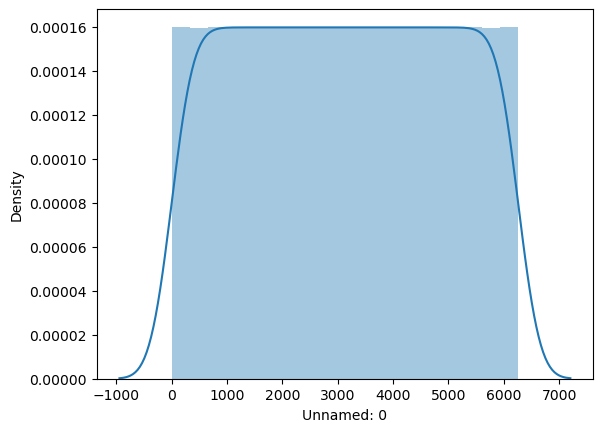

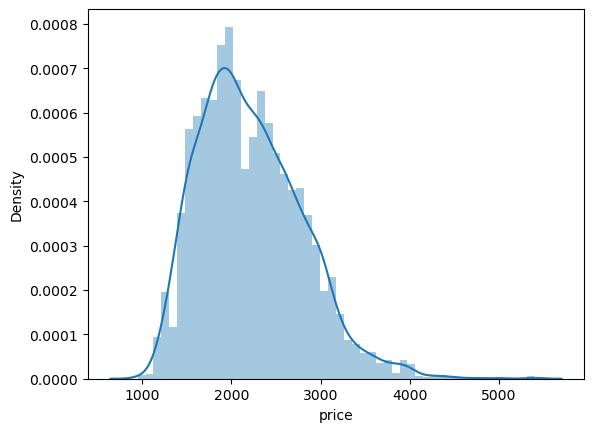

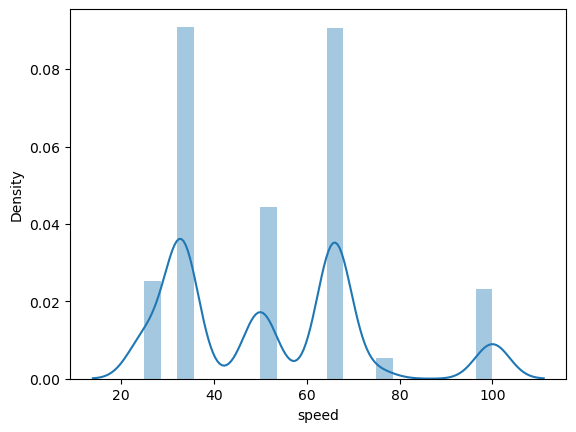

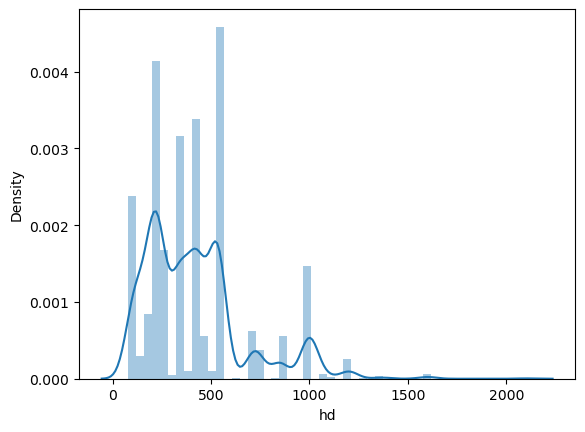

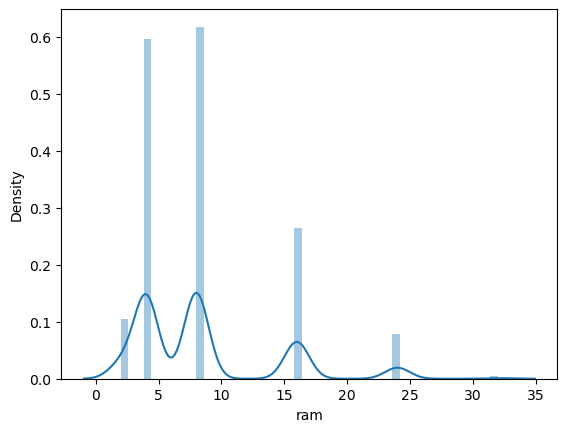

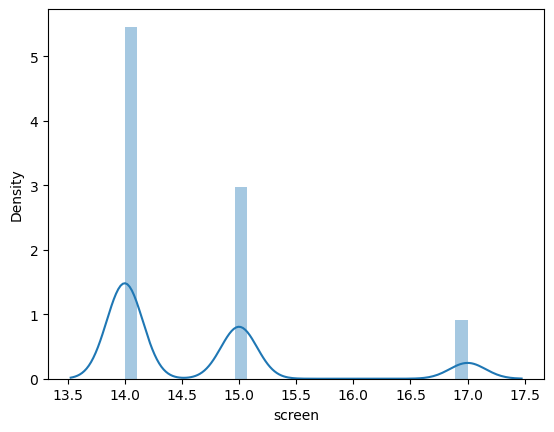

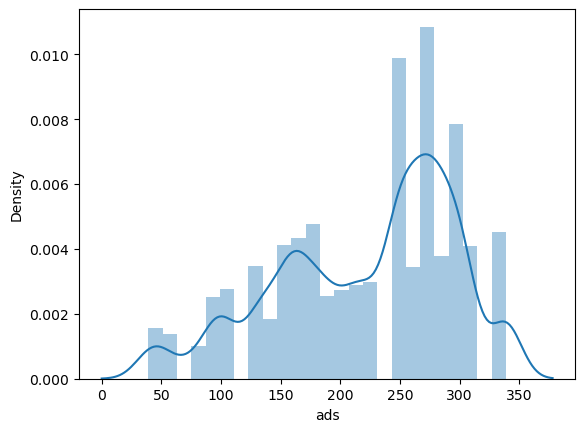

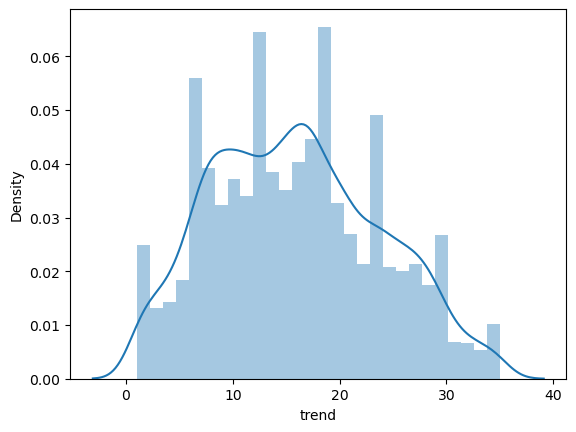

In [332]:
# Using Distance plot

for i, col, in enumerate(data_num.columns):
    plt.figure(i)
    sns.distplot(data_num[col])


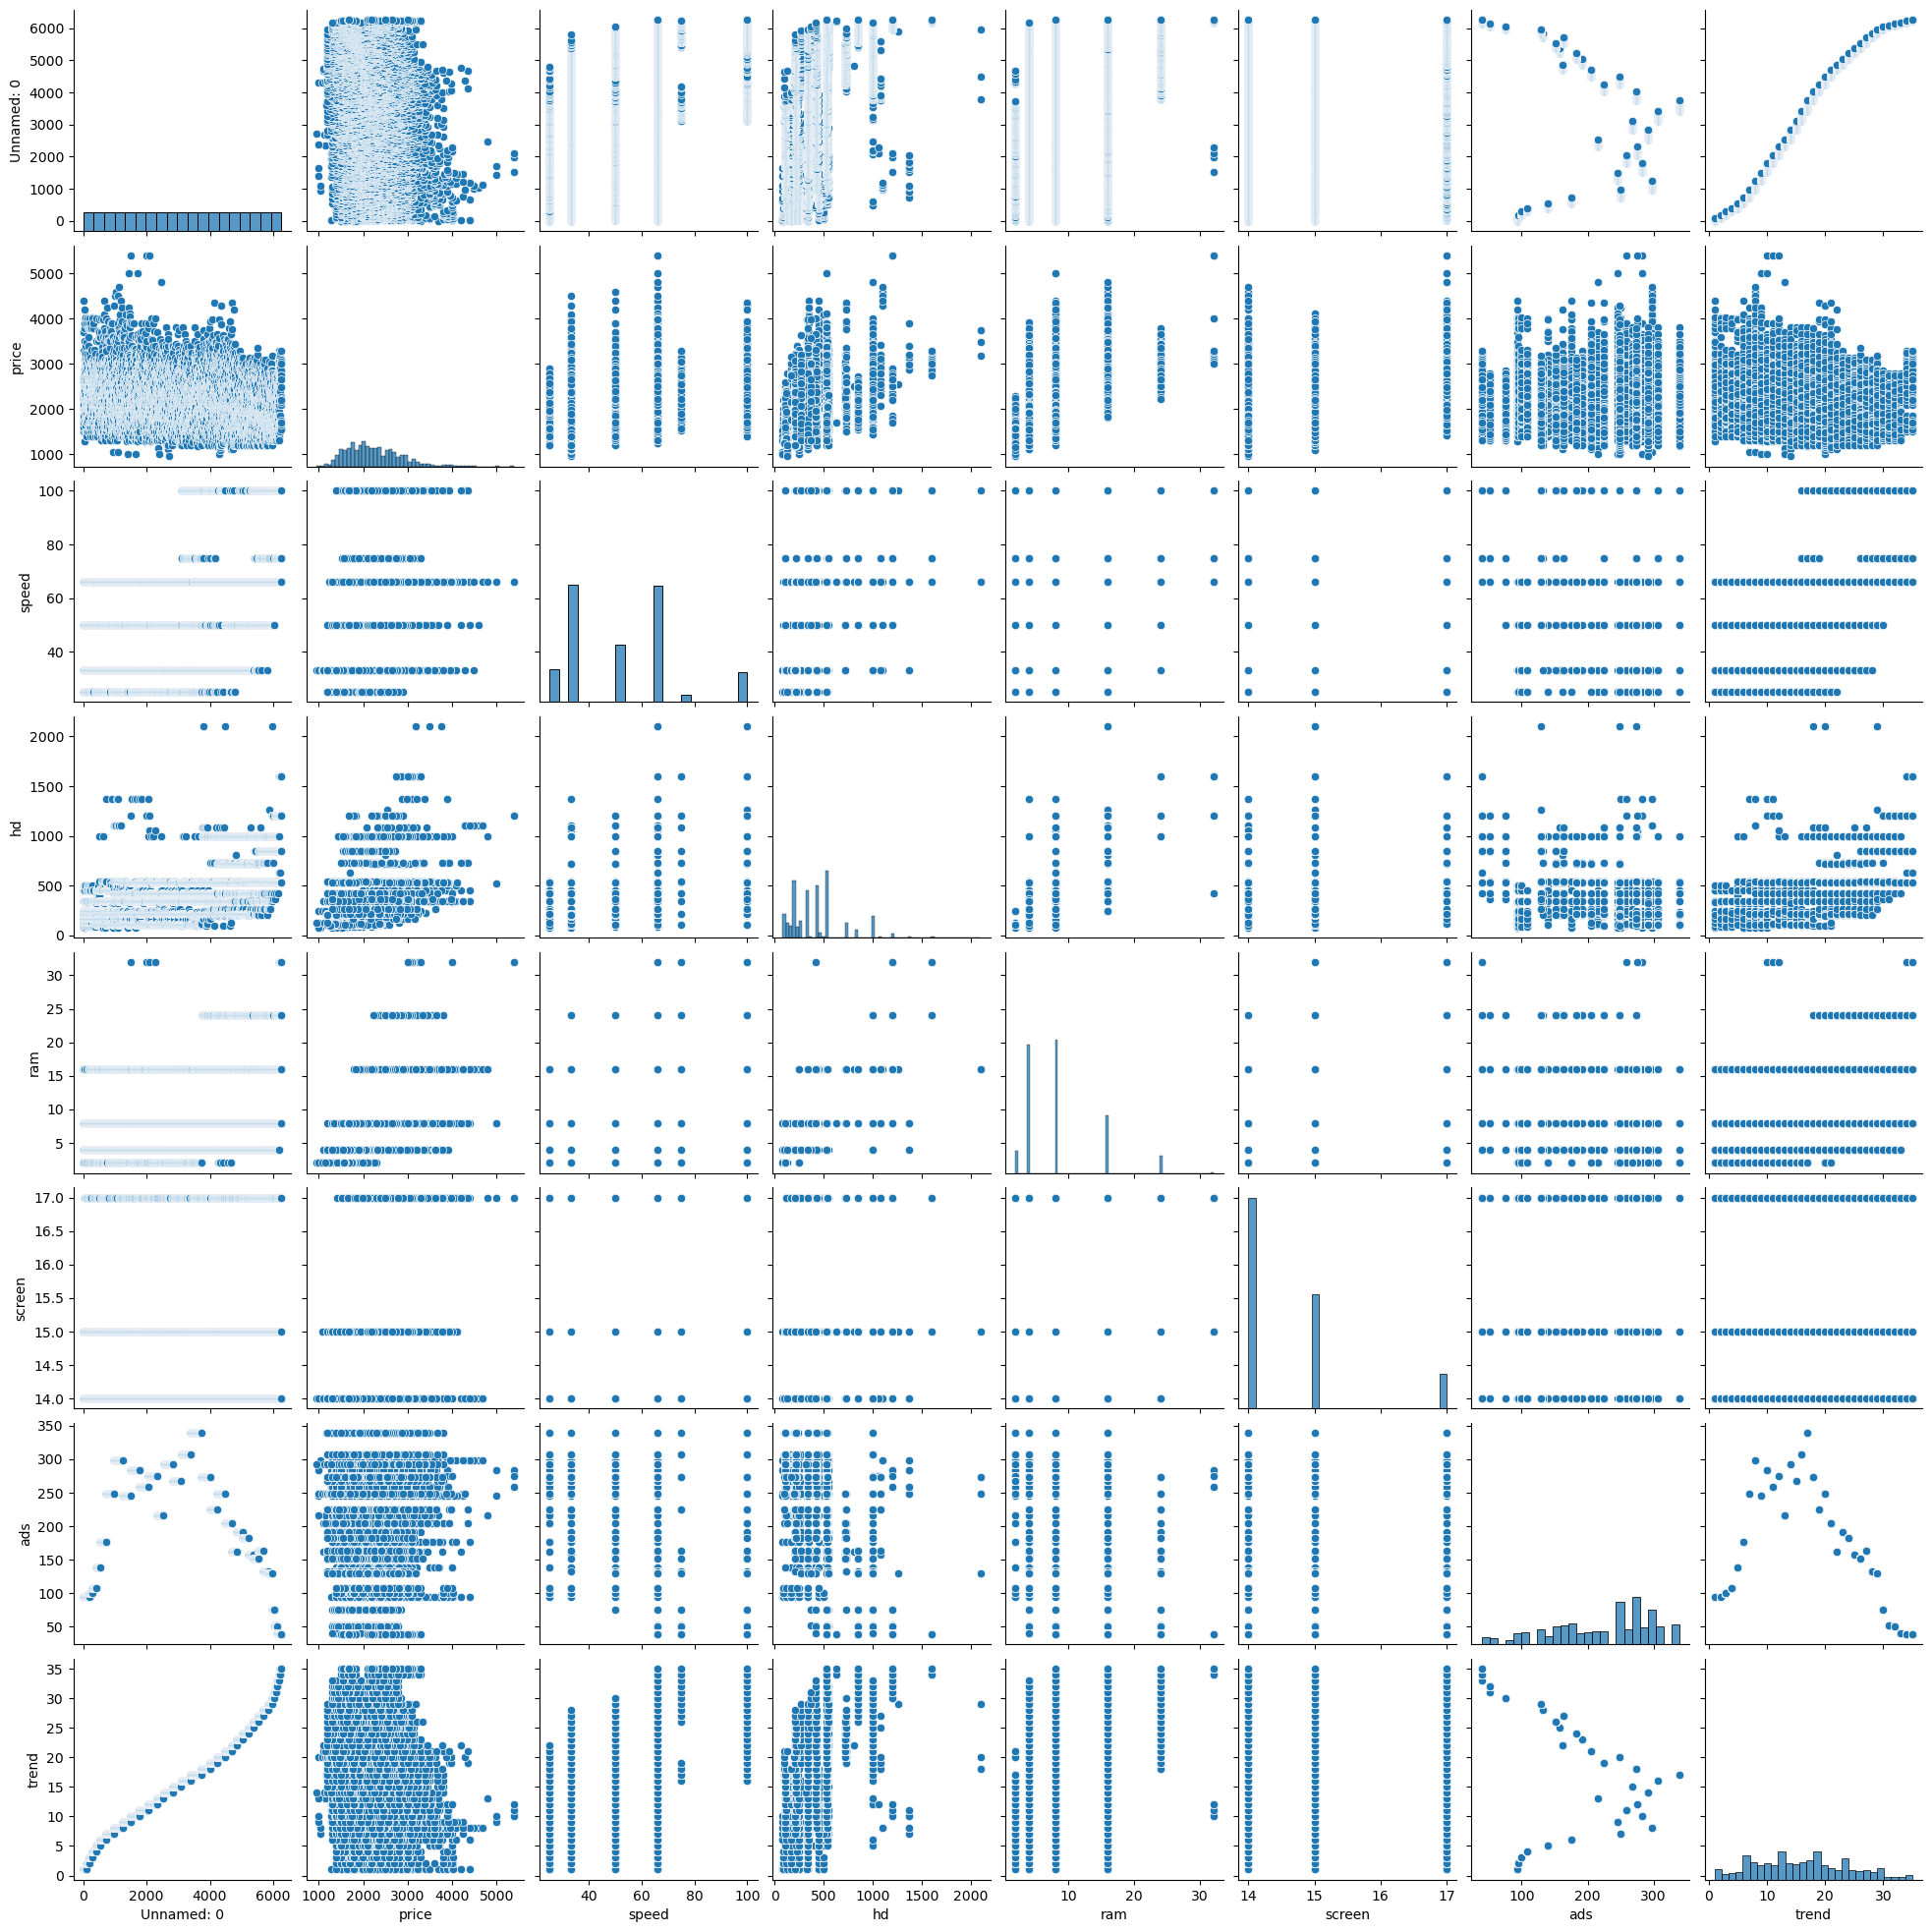

In [333]:
# Checking the pair plot

sns.pairplot(data_num)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e63a003100>,
 'caps': [<matplotlib.lines.Line2D at 0x1e63a0036a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e63a023370>,
 'medians': [<matplotlib.lines.Line2D at 0x1e63a003c40>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e63a003f10>,
 'means': []}

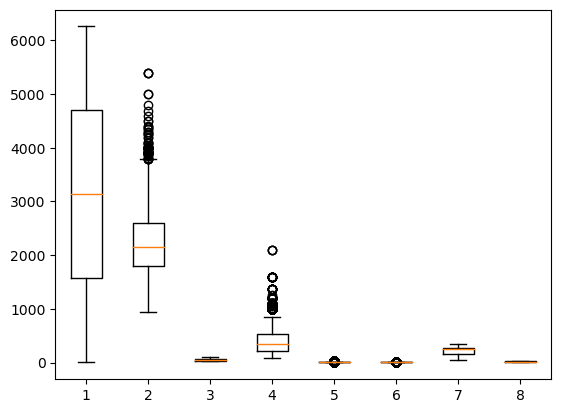

In [334]:
# Using boxplot to check outliers

plt.boxplot(data_num)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e63af962e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e63af96880>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e63b108fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e63af96e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e63afa3130>],
 'means': []}

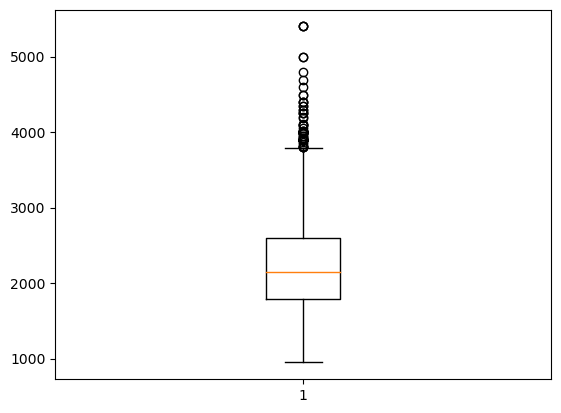

In [335]:
plt.boxplot(data_num['price'])

In [336]:
# Winsorizer will help To Clean Outliers 

from feature_engine.outliers import Winsorizer

<AxesSubplot:xlabel='price'>

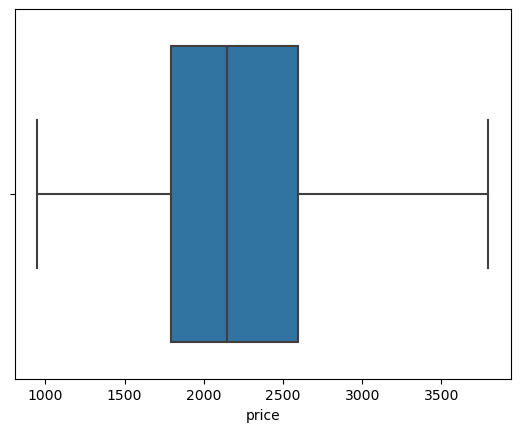

In [337]:
# Price column

winsor_iqr = Winsorizer(capping_method = 'iqr',
                             tail = 'both',
                              fold = 1.5,
                               variables = ('price'))

data_iqr = winsor_iqr.fit_transform(data_num[['price']])

sns.boxplot(data_iqr['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e63b057370>,
 'caps': [<matplotlib.lines.Line2D at 0x1e63b057910>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e63b0570a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e63b057eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e63b0641c0>],
 'means': []}

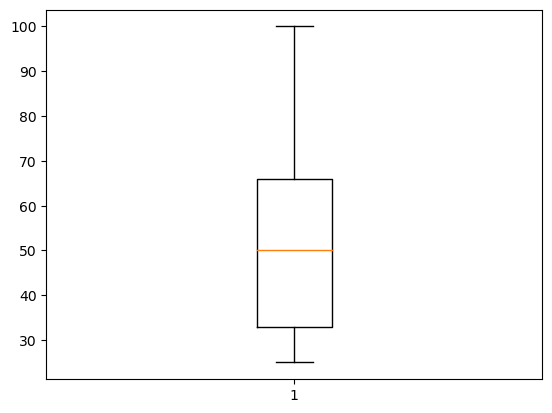

In [338]:
plt.boxplot(data_num['speed'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e63b0bd220>,
 'caps': [<matplotlib.lines.Line2D at 0x1e63b0bd7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e63b0b0f10>],
 'medians': [<matplotlib.lines.Line2D at 0x1e63b0bdd60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e63b0cb070>],
 'means': []}

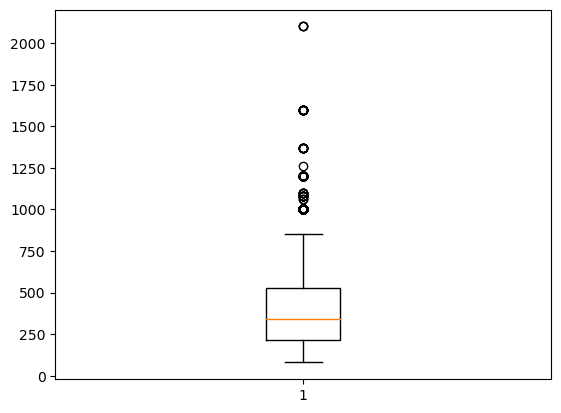

In [339]:
plt.boxplot(data_num['hd'])

<AxesSubplot:xlabel='hd'>

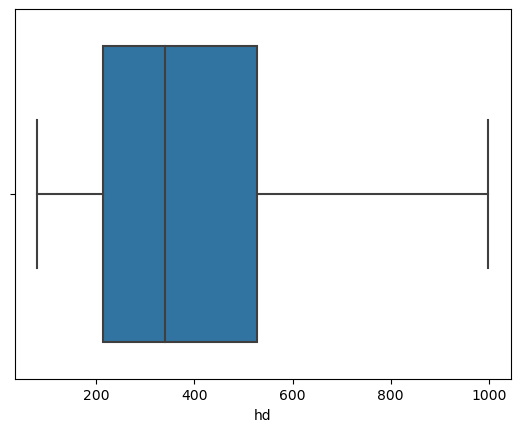

In [340]:
# hd column

winsor_iqr = Winsorizer(capping_method = 'iqr',
                             tail = 'both',
                              fold = 1.5,
                               variables = ('hd'))

data_iqr = winsor_iqr.fit_transform(data_num[['hd']])

sns.boxplot(data_iqr['hd'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e63b18c340>,
 'caps': [<matplotlib.lines.Line2D at 0x1e63b18c8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e63b18c070>],
 'medians': [<matplotlib.lines.Line2D at 0x1e63b18ce80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e63b19a190>],
 'means': []}

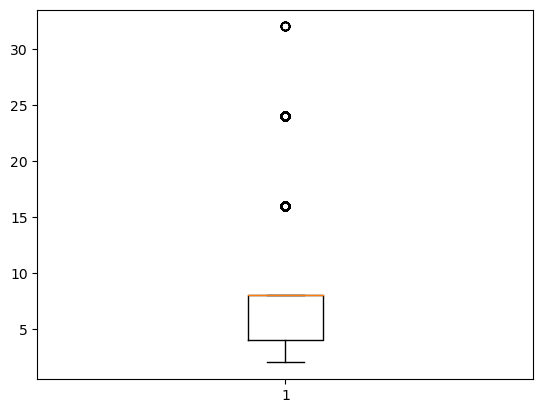

In [341]:
plt.boxplot(data_num['ram'])

<AxesSubplot:xlabel='ram'>

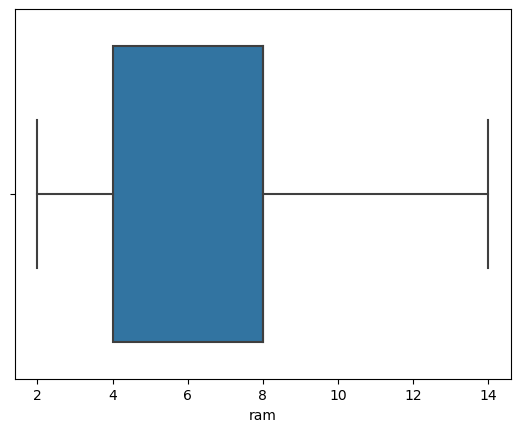

In [342]:
# ram column

winsor_iqr = Winsorizer(capping_method = 'iqr',
                             tail = 'both',
                              fold = 1.5,
                               variables = ('ram'))

data_iqr = winsor_iqr.fit_transform(data_num[['ram']])

sns.boxplot(data_iqr['ram'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e63b246f70>,
 'caps': [<matplotlib.lines.Line2D at 0x1e63b294550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e63b246ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e63b294af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e63b294dc0>],
 'means': []}

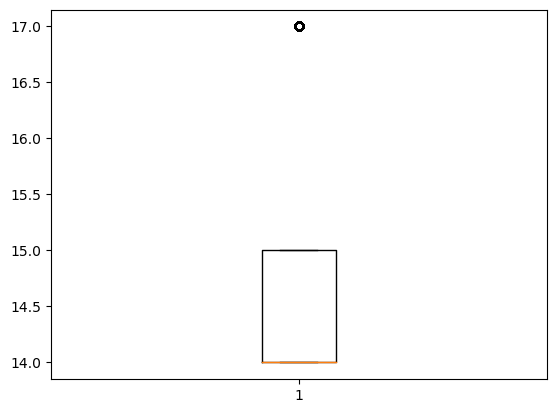

In [343]:
plt.boxplot(data_num['screen'])

<AxesSubplot:xlabel='screen'>

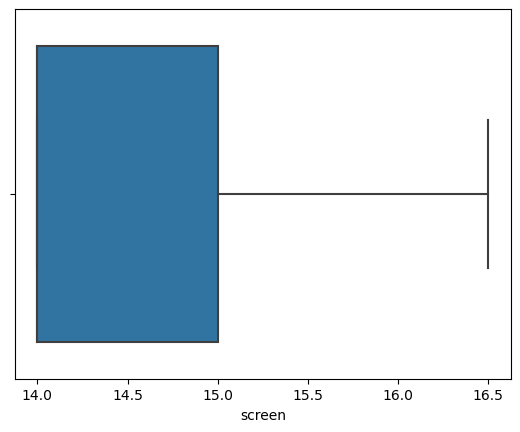

In [344]:
# Screen column

winsor_iqr = Winsorizer(capping_method = 'iqr',
                             tail = 'both',
                              fold = 1.5,
                               variables = ('screen'))

data_iqr = winsor_iqr.fit_transform(data_num[['screen']])

sns.boxplot(data_iqr['screen'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e63b48f910>,
 'caps': [<matplotlib.lines.Line2D at 0x1e63b48feb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e63b48f640>],
 'medians': [<matplotlib.lines.Line2D at 0x1e63b320430>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e63b320700>],
 'means': []}

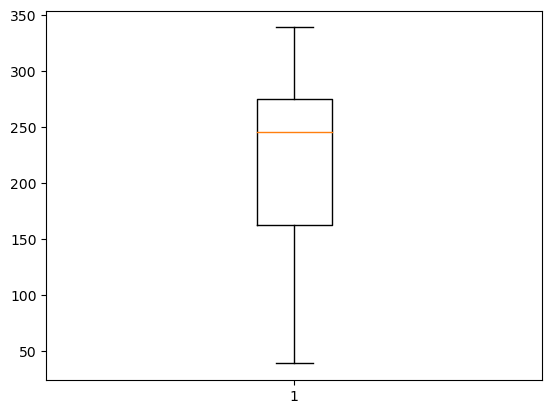

In [345]:
plt.boxplot(data_num['ads'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e63b37e1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e63b37e760>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e63b36beb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e63b37ed00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e63b37efd0>],
 'means': []}

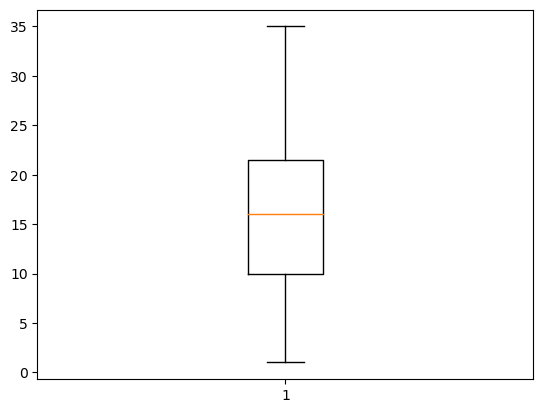

In [346]:
plt.boxplot(data_num['trend'])

In [347]:
# Checking the Duplicates in data

duplicates = data.duplicated()
sum(duplicates)

0

In [348]:
# Checking the zero Variance 

data.var() == 0

Unnamed: 0    False
price         False
speed         False
hd            False
ram           False
screen        False
ads           False
trend         False
dtype: bool

In [349]:
# Checking the Missing Values

data.isna().sum()

Unnamed: 0    0
price         0
speed         0
hd            0
ram           0
screen        0
cd            0
multi         0
premium       0
ads           0
trend         0
dtype: int64

In [350]:
# 1 hot Encoding - Label Encoding

from sklearn.preprocessing import LabelEncoder

In [351]:
enc = LabelEncoder()

data_cat['cd'] = enc.fit_transform(data['cd'])
data_cat['multi'] = enc.fit_transform(data['multi'])
data_cat['premium'] = enc.fit_transform(data['premium'])

In [352]:
data_cat

,cd,multi,premium
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,0
4,0,0,1
...,...,...,...
6254,0,0,1
6255,1,1,1
6256,1,0,1
6257,1,0,1


In [353]:
# Checking the columns values

data['ads'].value_counts()

339    339
307    307
298    298
292    292
283    283
275    275
273    273
267    267
259    259
249    249
248    248
246    246
225    225
216    216
205    205
191    191
182    182
176    176
163    163
162    162
158    158
152    152
139    139
132    132
129    129
108    108
100    100
95      95
94      94
39      78
75      75
52      52
51      51
40      40
Name: ads, dtype: int64

In [354]:
data['trend'].value_counts()

17    339
16    307
8     298
14    292
10    283
12    275
18    273
15    267
11    259
7     249
20    248
9     246
19    225
13    216
21    205
23    191
24    182
6     176
27    163
22    162
25    158
26    152
5     139
28    132
29    129
4     108
3     100
2      95
1      94
30     75
31     52
32     51
33     40
34     39
35     39
Name: trend, dtype: int64

In [355]:
# Converting data_cat & data_num to Dataframe

data_cat = pd.DataFrame(data_cat)
data_num = pd.DataFrame(data_num)

In [356]:
# Concatenation of data_cat, data_num into data

data = pd.concat((data_num, data_cat), axis = 1)

In [357]:
# Checking the data

data

,Unnamed: 0,price,speed,hd,ram,screen,ads,trend,cd,multi,premium
0,1,1499,25,80,4,14,94,1,0,0,1
1,2,1795,33,85,2,14,94,1,0,0,1
2,3,1595,25,170,4,15,94,1,0,0,1
3,4,1849,25,170,8,14,94,1,0,0,0
4,5,3295,33,340,16,14,94,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,39,35,0,0,1
6255,6256,2223,66,850,16,15,39,35,1,1,1
6256,6257,2654,100,1200,24,15,39,35,1,0,1
6257,6258,2195,100,850,16,15,39,35,1,0,1


In [358]:
# Transformation

import scipy.stats as stats
import pylab

((array([-3.69316996, -3.46128945, -3.33365932, ...,  3.33365932,
          3.46128945,  3.69316996]),
  array([ 949,  999,  999, ..., 5399, 5399, 5399], dtype=int64)),
 (571.8357471962948, 2219.576609682058, 0.98410055187607))

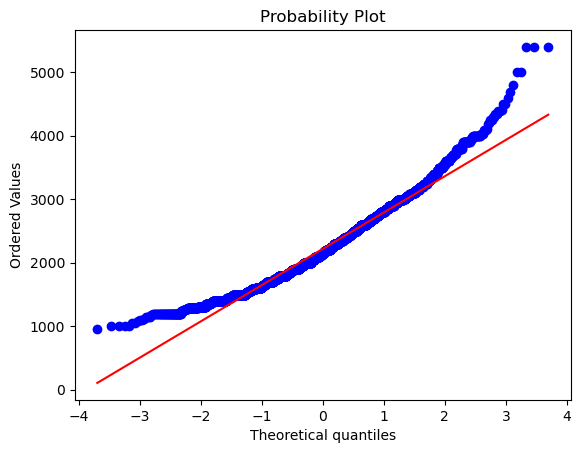

In [359]:
stats.probplot(data['price'], dist = 'norm', plot = pylab)

In [360]:
# Checking the describe to check min and max

data.describe()

,Unnamed: 0,price,speed,hd,ram,screen,ads,trend,cd,multi,premium
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,3130.000000,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985,0.464611,0.139479,0.902221
std,1806.961999,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984,0.498786,0.346474,0.297040
min,1.000000,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000,0.000000,0.000000,0.000000
25%,1565.500000,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000,0.000000,0.000000,1.000000
50%,3130.000000,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000,0.000000,0.000000,1.000000
75%,4694.500000,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000,1.000000,0.000000,1.000000
max,6259.000000,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000,1.000000,1.000000,1.000000


In [361]:
# Checking Correalations

data.corr()

,Unnamed: 0,price,speed,hd,ram,screen,ads,trend,cd,multi,premium
Unnamed: 0,1.000000,-0.199924,0.388566,0.555492,0.265376,0.184699,-0.272714,0.989818,0.458642,0.218066,0.037364
price,-0.199924,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987,0.197343,-0.016651,-0.080696
speed,0.388566,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438,0.258260,0.084172,0.114208
hd,0.555492,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790,0.503570,0.092805,0.196924
ram,0.265376,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844,0.438504,0.045497,0.197145
screen,0.184699,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614,0.129488,-0.001740,0.018745
ads,-0.272714,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553,-0.061091,-0.030394,-0.152023
trend,0.989818,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000,0.445780,0.210907,0.042107
cd,0.458642,0.197343,0.258260,0.503570,0.438504,0.129488,-0.061091,0.445780,1.000000,0.432179,0.216077
multi,0.218066,-0.016651,0.084172,0.092805,0.045497,-0.001740,-0.030394,0.210907,0.432179,1.000000,0.124775


<AxesSubplot:>

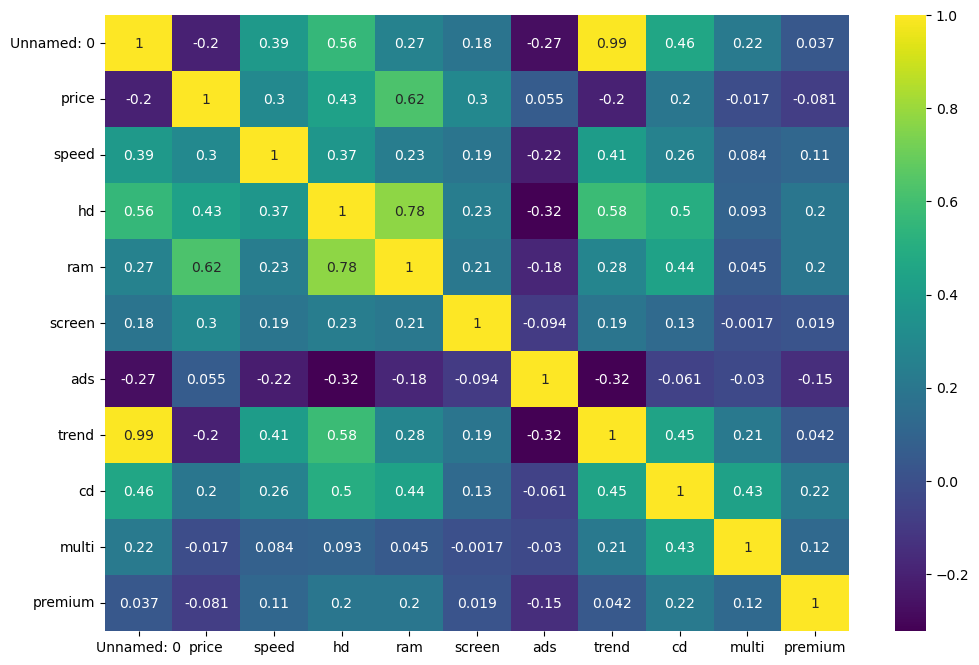

In [362]:
# Heat Map

fig = plt.figure(figsize = (12,8))
sns.heatmap(data.corr(), cmap='viridis', annot = True) 

In [363]:
# Rearrange the order of the variables
data = data.iloc[:, [ 0, 1, 2, 3, 4, 5, 6, 8, 9 ,10, 7 ]]
data.columns

Index(['Unnamed: 0', 'price', 'speed', 'hd', 'ram', 'screen', 'ads', 'cd',
       'multi', 'premium', 'trend'],
      dtype='object')

In [364]:
# Removing the column unnamed 

data = data.drop((['Unnamed: 0']), axis = 1)

In [365]:
data

,price,speed,hd,ram,screen,ads,cd,multi,premium,trend
0,1499,25,80,4,14,94,0,0,1,1
1,1795,33,85,2,14,94,0,0,1,1
2,1595,25,170,4,15,94,0,0,1,1
3,1849,25,170,8,14,94,0,0,0,1
4,3295,33,340,16,14,94,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
6254,1690,100,528,8,15,39,0,0,1,35
6255,2223,66,850,16,15,39,1,1,1,35
6256,2654,100,1200,24,15,39,1,0,1,35
6257,2195,100,850,16,15,39,1,0,1,35


In [366]:
# segregating the data column

X = data.drop(labels = ['price'], axis = 1)
Y = data.price

In [367]:
# Importing the train_test_split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, shuffle=True)

In [368]:
X

,speed,hd,ram,screen,ads,cd,multi,premium,trend
0,25,80,4,14,94,0,0,1,1
1,33,85,2,14,94,0,0,1,1
2,25,170,4,15,94,0,0,1,1
3,25,170,8,14,94,0,0,0,1
4,33,340,16,14,94,0,0,1,1
...,...,...,...,...,...,...,...,...,...
6254,100,528,8,15,39,0,0,1,35
6255,66,850,16,15,39,1,1,1,35
6256,100,1200,24,15,39,1,0,1,35
6257,100,850,16,15,39,1,0,1,35


In [369]:
Y

0       1499
1       1795
2       1595
3       1849
4       3295
        ... 
6254    1690
6255    2223
6256    2654
6257    2195
6258    2490
Name: price, Length: 6259, dtype: int64

In [380]:
# Model Building 

from sklearn.linear_model import LinearRegression

In [381]:
# Binarization - Discritization 

X = (X > 0).astype(int)
Y = (Y > 0).astype(int)

x_train = (x_train > 0).astype(int)
y_train = (y_train > 0).astype(int)

x_test = (x_test > 0).astype(int)
y_test = (y_test > 0).astype(int)

data = (data > 0).astype(int)

In [382]:
x_train

,speed,hd,ram,screen,ads,cd,multi,premium,trend
1177,1,1,1,1,1,0,0,1,1
3766,1,1,1,1,1,1,0,1,1
3806,1,1,1,1,1,1,1,1,1
4316,1,1,1,1,1,0,0,0,1
4674,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
905,1,1,1,1,1,0,0,0,1
5192,1,1,1,1,1,0,0,1,1
3980,1,1,1,1,1,1,0,1,1
235,1,1,1,1,1,0,0,1,1


In [383]:
y_train

1177    1
3766    1
3806    1
4316    1
4674    1
       ..
905     1
5192    1
3980    1
235     1
5157    1
Name: price, Length: 4381, dtype: int32

In [384]:
model = LinearRegression()
model.fit(x_train, y_train)

# Checking the model score
model.score(X, Y)

1.0

In [390]:
model.score(x_train, y_train)

1.0

In [391]:
model.score(x_test, y_test)

1.0

In [385]:
y_pred = model.predict(x_test)

In [386]:
# Confussion Metrix

from sklearn.metrics import confusion_matrix, accuracy_score

In [387]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[1878]]


1.0

In [388]:
Y.reset_index(drop = True)

0       1
1       1
2       1
3       1
4       1
       ..
6254    1
6255    1
6256    1
6257    1
6258    1
Name: price, Length: 6259, dtype: int32

In [389]:
## K-fold cross validation

from sklearn.model_selection import cross_val_score

score = cross_val_score(model, X, Y, scoring='accuracy', cv = 10)
print(score)
print(score.mean())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0


### Result : The Training and Test dataset are pretty same and good, concluding the model is Right Fit